In [1]:
homedir = "/home/annzhou"
tseedlist = range(5)
multlistdatadict = dict()
multlistdatadict["tor"] = [[0,72,100],[0,96,100],[1,44,100],[2,88,100],[11,50,100]]
multlistdatadict["network"] = [[0,45,100],[0,80,100],[1,80,100],[7,20,100],[115,20,100]]
cdatadict = dict()
cdatadict["tor"] = [64,48,32,16,4]
cdatadict["network"] = [64,48,32,16,4]
sdatadict = dict()
sdatadict["tor"] = [4]*5
sdatadict["network"] = [64,48,32,16,4]
sumfiledatadict = dict()
sumfiledatadict["tor"] = f"{homedir}/DRing/src/emp/datacentre/experiments/torbottleneck/torbottleneck.txt"
sumfiledatadict["network"] = f"{homedir}/DRing/src/emp/datacentre/experiments/networkbottleneck/networkbottleneck.txt"

/tmp/ipykernel_930495/3332437897.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[iitem].set_xticklabels(ax[iitem].get_xticklabels(), fontsize=16)
/tmp/ipykernel_930495/3332437897.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[iitem].set_yticklabels(ax[iitem].get_yticklabels(),fontsize=16)


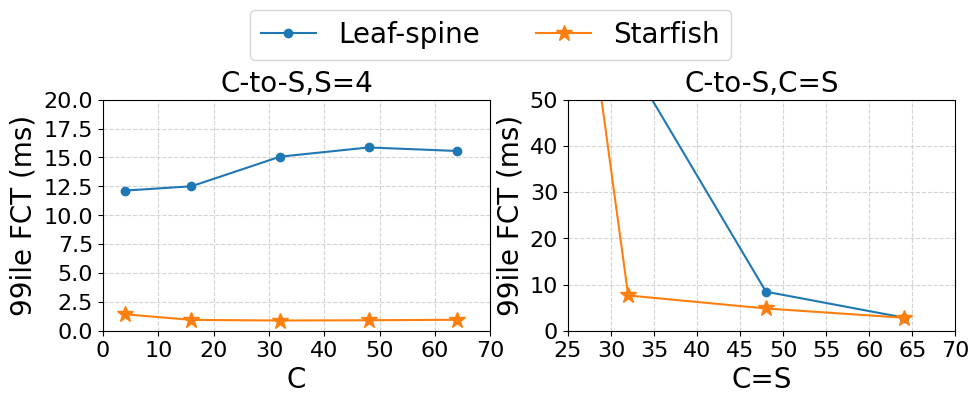

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

titlelist = ["C-to-S,S=4","C-to-S,C=S"]
xlabellist = ["C","C=S"]
ylimupperlist = [20,50]
xlimlowerlist = [0,25]
index = 3

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig, ax = plt.subplots(1,2,figsize=(5*2+1,3*1))

for iitem,item in enumerate(["tor","network"]):
    ylist_ls = list()
    ylist_dring = list()
    for ic,c in enumerate(cdatadict[item]):
        s = sdatadict[item][ic]
        mult = multlistdatadict[item][ic][0]
        numerator = multlistdatadict[item][ic][1]
        denominator = multlistdatadict[item][ic][2]
        multstr = f"{mult}_{numerator}_{denominator}"

        fct_over_tseed_ls = list()
        fct_over_tseed_dring = list()
        with open(sumfiledatadict[item],'r') as f:
            lines = f.readlines()
            for tseed in tseedlist:
                logfile = f"m_{item}bottleneck_leafspine_{c}_{s}_{multstr}_{tseed}.log"
                for line in lines:
                    tokens = line.split()
                    if tokens[0] == logfile:
                        n99fct = float(tokens[index])
                        fct_over_tseed_ls.append(n99fct)
            ylist_ls.append(sum(fct_over_tseed_ls)/len(fct_over_tseed_ls))

            for tseed in tseedlist:
                logfile = f"m_{item}bottleneck_dring_{c}_{s}_{multstr}_{tseed}.log"
                for line in lines:
                    tokens = line.split()
                    if tokens[0] == logfile:
                        n99fct = float(tokens[index])
                        fct_over_tseed_dring.append(n99fct)
            ylist_dring.append(sum(fct_over_tseed_dring)/len(fct_over_tseed_dring))
            
    ax[iitem].plot(cdatadict[item],ylist_ls,label="Leaf-spine",marker='.',markersize=12)
    ax[iitem].plot(cdatadict[item],ylist_dring,label="Starfish",marker='*',markersize=12)
    ax[iitem].set_xlabel(xlabellist[iitem], fontsize=20)
    ax[iitem].set_ylabel('99ile FCT (ms)', fontsize=20)
    ax[iitem].set_title(titlelist[iitem], fontsize=20)
    ax[iitem].set_xlim(xlimlowerlist[iitem],70)
    ax[iitem].set_ylim(0,ylimupperlist[iitem])
    ax[iitem].grid(color='lightgrey', linestyle='dashed', axis="both")    
    ax[iitem].set_xticklabels(ax[iitem].get_xticklabels(), fontsize=16)
    ax[iitem].set_yticklabels(ax[iitem].get_yticklabels(),fontsize=16)

handles, labels = ax[0].get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(-0.2, 1.45), fontsize=20)
plt.savefig(f"{homedir}/DRing/src/emp/datacentre/nsdi25_plotting/fig_c2s.pdf", dpi=600, bbox_inches='tight')
plt.show()